In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
root = os.getcwd()
models = os.path.join(root,'models')
utils = os.path.join(root,'utils')
run = os.path.join(root,'run')

sys.path.append(root)
sys.path.append(models)
sys.path.append(utils)

In [3]:
from models.GAN import GAN

In [4]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'mnist_fashion'
RUN_FOLDER = os.path.join(run, SECTION, '_'.join([RUN_ID, DATA_NAME]))


if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

In [5]:
mode =  'build' #'load' #

In [6]:
def load_mnist_fashion():
    # Load the dataset
    (X_train, _), (_, _) = fashion_mnist.load_data()
    
    return X_train

x_train = load_mnist_fashion()

In [7]:
x_train.shape

(60000, 28, 28)

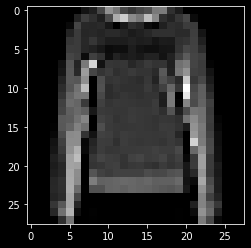

In [8]:
plt.imshow(x_train[400,:,:],cmap='gray')

In [9]:
gan = GAN(input_dim = (28, 28, 1)
        , discriminator_conv_filters = [64, 64, 128, 128]
        , discriminator_conv_kernel_size = [5, 5, 5, 5]
        , discriminator_conv_strides = [2, 2, 2, 1]
        , discriminator_batch_norm_momentum = .8
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2, 2, 1, 1]
        , generator_conv_filters = [128, 64, 64, 1]
        , generator_conv_kernel_size = [5, 5, 5, 5]
        , generator_conv_strides = [1, 1, 1, 1]
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'adam'
        , z_dim = 100
        )

In [10]:
gan.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0   

In [11]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_4 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

In [12]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [14]:
x_train = np.expand_dims(x_train, axis=3)

gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

C:\Users\benmc\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
0 [D loss: (2.106)(R 0.447, F 3.765)] [D acc: (0.445)(0.891, 0.000)] [G loss: 0.433] [G acc: 0.812]
C:\Users\benmc\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
1 [D loss: (1.068)(R 0.324, F 1.813)] [D acc: (0.484)(0.969, 0.000)] [G loss: 1.026] [G acc: 0.234]
2 [D loss: (0.736)(R 0.515, F 0.956)] [D acc: (0.594)(0.844, 0.344)] [G loss: 1.160] [G acc: 0.219]
3 [D loss: (1.091)(R 0.580, F 1.601)] [D acc: (0.391)(0.750, 0.031)] [G loss: 

KeyboardInterrupt: 